In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
def plot_heat_map(table,title=""):
    plt.pcolor(table)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(title)
    plt.show()

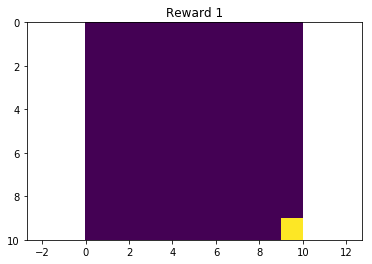

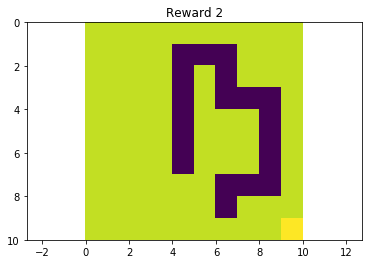

In [122]:
# QUESTION 1

reward_table_1 = np.zeros((10,10))
reward_table_1[9,9] = 1

reward_table_2 = np.zeros((10,10))
reward_table_2[1:7,4] = -100
reward_table_2[1,5] = -100
reward_table_2[1:4,6] = -100
reward_table_2[7:9,6] = -100
reward_table_2[3,7] = -100
reward_table_2[7,7] = -100
reward_table_2[3:8,8] = -100
reward_table_2[9,9] = 10

# Plot Rewards
plot_heat_map(reward_table_1,"Reward 1")
plot_heat_map(reward_table_2,"Reward 2")

In [123]:
# QUESTION 2: Value Iteration

def value_iteration(reward, estimation_step, w, gamma):
    # Initialization Step
    V = np.zeros(reward.shape)
    P = np.zeros(reward.shape)
    delta = float('inf')
    
    iteration = 0
    while delta > estimation_step:
        delta = 0
        # Value estimation step
        for r in range(V.shape[0]):
            for c in range(V.shape[1]):

                # Get the value for each action and store the max value
                best_action_value = -float('inf')
                
                # By default the best action is 'up'
                best_action = 0 
                
                for a in range(4):
                    action_value = 0
                    # For each actual executed action, get the state-action value
                    for ex in range(4):

                        # Get s', given the resulting action (not necessarily the action chosen by agent)

                        # Case where the resulting action is "up"
                        if ex == 0:
                            next_r, next_c = (max(r-1,0), c)
                        # Case where the resulting action is "left"
                        elif ex == 1:
                            next_r, next_c = (r, max(c-1,0))
                        # Case where the resulting action is "down"
                        elif ex == 2:
                            next_r, next_c = (min(r+1, V.shape[0]-1), c)
                        # Case where the resulting action is "right"
                        elif ex == 3:
                            next_r, next_c = (r, min(c+1, V.shape[1]-1))

                        # Get the probability that s' is visited, given the s and a
                        execution_probability = (w / 4) # all of the neighboring states have a w/4 chance of being visited

                        # If the executed action is the same as the chosen action, this has a higher probability
                        if ex == a:
                            execution_probability += (1-w)

                        # Compute the value if the agent at state s picks action a, and ends up at [next_r, next_c]
                        action_value += (execution_probability) * (reward[next_r,next_c] + gamma*V[next_r,next_c])

                    # This is essentially maximizing the value with respect to each possible action
                    if action_value > best_action_value:
                        best_action_value = action_value
                        best_action = a

                delta = max(delta, abs(V[r][c] - best_action_value))
                V[r][c] = best_action_value 
                P[r][c] = best_action
            iteration += 1
    return V,P

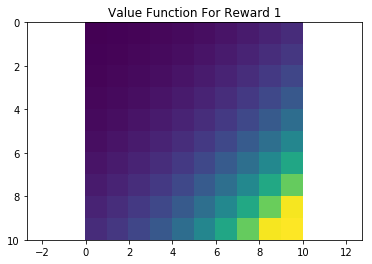

In [124]:
# Question 3: run value iteration and generate heat map on reward 1
estimation_step = 0.01
random_action_prob = 0.1
gamma = 0.8
V,P = value_iteration(reward_table_1, estimation_step, random_action_prob, gamma)
plot_heat_map(V, "Value Function For Reward 1")

In [125]:
## Question 4: Explain the distribution

# The only reward is at the bottom right, so it makes sense that the value function is higher there.
# The value should decrease as you get away from the reward because we have a discount factor less than one.
# This means if the agent starts at the top left corner, it has a low value because it needs many steps to reach the reward.


In [126]:
# Question 5: Get the policy from the value

# Outputting the policy is already implemented in the value_iteration() method to prevent writing unnecessary code
# We will just implement the plotting of the policy with quivers

def plot_policy(P,title=""):
    U = np.zeros(P.shape)
    V = np.zeros(P.shape)
    for r in range(P.shape[0]):
        for c in range(P.shape[1]):
            # If policy says go up
            if P[r][c] == 0:
                U[r][c], V[r][c] = 0,1
            # If policy says go left
            elif P[r][c] == 1:
                U[r][c], V[r][c] = -1,0
            # If policy says go down
            elif P[r][c] == 2:
                U[r][c], V[r][c] = 0,-1
            # If policy says go right
            elif P[r][c] == 3:
                U[r][c], V[r][c] = 1,0
    plt.quiver(U,V)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.title(title)
    plt.show()

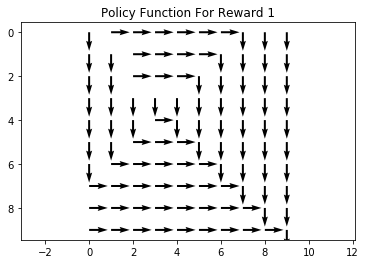

In [127]:
plot_policy(P,"Policy Function For Reward 1")

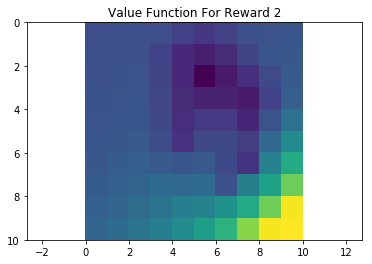

In [128]:
# Question 6, 7: Find the optimal values for Reward 2
estimation_step = 0.01
random_action_prob = 0.1
gamma = 0.8
V_2,P_2 = value_iteration(reward_table_2, estimation_step, random_action_prob, gamma)
plot_heat_map(V_2, "Value Function For Reward 2")

In [ ]:
# Question 8: Explain the distribution

# Close to the reward is still good, with low values near the dangerous territory with reward -100.

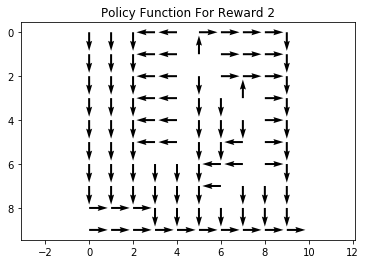

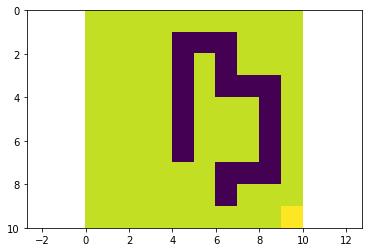

In [131]:
# Question 9: Plot the policy
plot_policy(P_2,"Policy Function For Reward 2")
plot_heat_map(reward_table_2)